In [1]:
import json

import numpy as np
import torch

In [2]:
pid = '3A_001'

In [3]:
embeddings = torch.load(f'../features/features/{pid}_HE.pt')
print("Embeddings:", embeddings.shape)

Embeddings: torch.Size([238673, 1024])


In [4]:
coords = np.load(f'../features/coordinates/{pid}_HE.npy')
print("Coordinates:", coords.shape)

Coordinates: (238673,)


In [5]:
with open(f'../data/{pid}/{pid}_RNA.json') as f:
    rna_json = json.load(f)
rna_values = np.array(list(rna_json.values()))
print("RNA values shape:", rna_values.shape)

RNA values shape: (19359,)


In [6]:
with open(f'../data/{pid}/{pid}_CD.json') as f:
    cd_json = json.load(f)
cd_values = np.array(list(cd_json.values()))
print("Clinical Data values shape:", cd_values.shape)

Clinical Data values shape: (15,)


In [7]:
for k, v in cd_json.items():
    print(f"{k}: {v}")

age: 72
sex: Male
smoking: No
tumor: Primary
stage: T1HG
substage: T1m
grade: G3
reTUR: Yes
LVI: No
variant: UCC
EORTC: Highest risk
no_instillations: 24.0
BRS: BRS2
progression: 0
time_to_HG_recur_or_FUend: 110


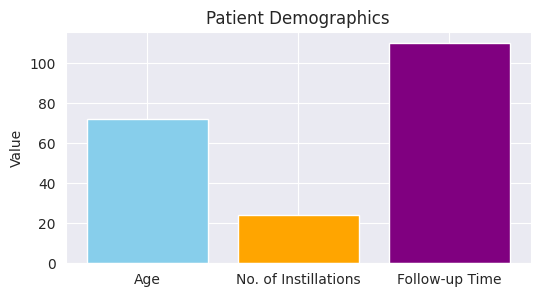

In [8]:
import matplotlib.pyplot as plt

# Demographic
labels = ['Age', 'No. of Instillations', 'Follow-up Time']
values = [72, 24.0, 110]

plt.figure(figsize=(6, 3))
plt.bar(labels, values, color=['skyblue', 'orange', 'purple'])
plt.title("Patient Demographics")
plt.ylabel("Value")
plt.show()

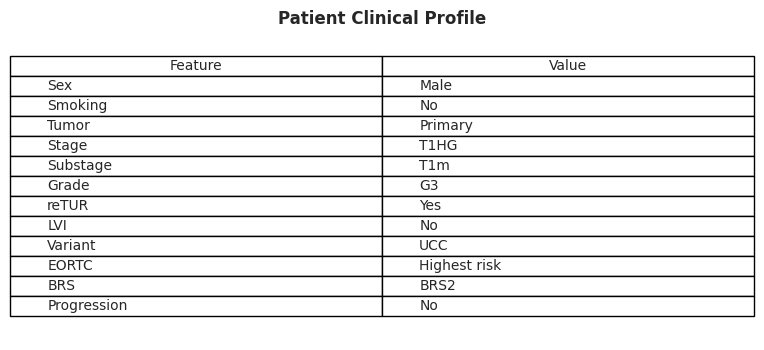

In [9]:
import pandas as pd

data = {
    "Feature": ['Sex', 'Smoking', 'Tumor', 'Stage', 'Substage', 'Grade', 'reTUR',
                'LVI', 'Variant', 'EORTC', 'BRS', 'Progression'],
    "Value": ['Male', 'No', 'Primary', 'T1HG', 'T1m', 'G3', 'Yes',
              'No', 'UCC', 'Highest risk', 'BRS2', 'No']
}

df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='left')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title("Patient Clinical Profile", fontweight='bold')
plt.show()

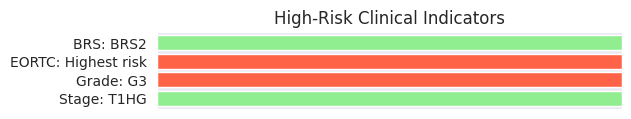

In [10]:
features = ['Stage: T1HG', 'Grade: G3', 'EORTC: Highest risk', 'BRS: BRS2']
colors = ['tomato' if 'risk' in f or 'G3' in f else 'lightgreen' for f in features]

plt.figure(figsize=(6, 1))
plt.barh(features, [1] * len(features), color=colors)
plt.xlim(0, 1)
plt.title("High-Risk Clinical Indicators")
plt.xticks([])
plt.show()


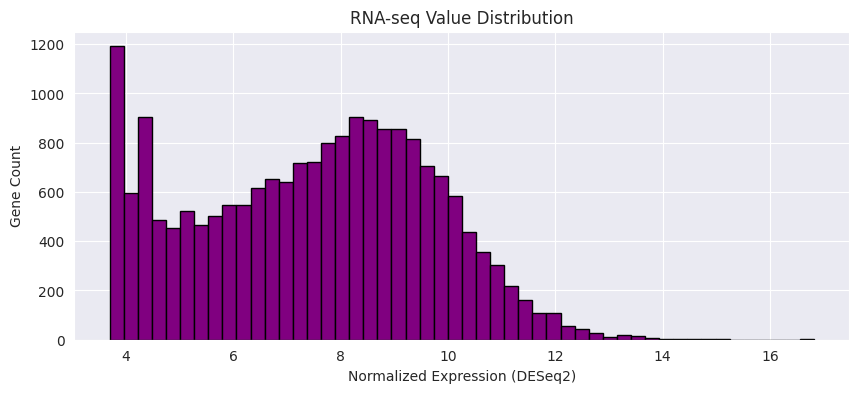

In [11]:
plt.figure(figsize=(10, 4))
plt.hist(rna_values, bins=50, color='purple', edgecolor='black')
plt.title("RNA-seq Value Distribution")
plt.xlabel("Normalized Expression (DESeq2)")
plt.ylabel("Gene Count")
plt.show()

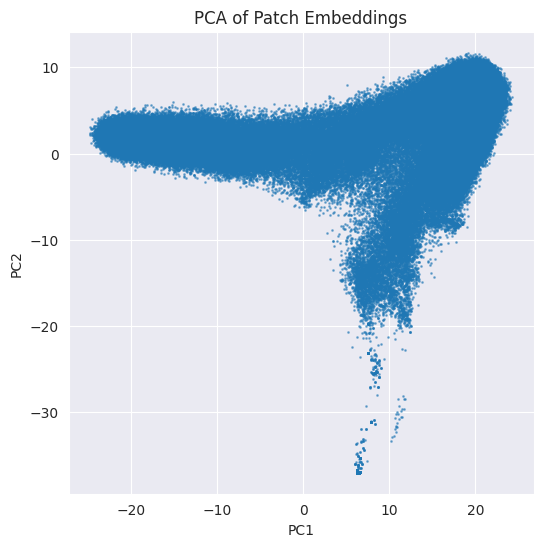

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings.numpy())

plt.figure(figsize=(6, 6))
plt.scatter(proj[:, 0], proj[:, 1], s=1, alpha=0.5)
plt.title("PCA of Patch Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


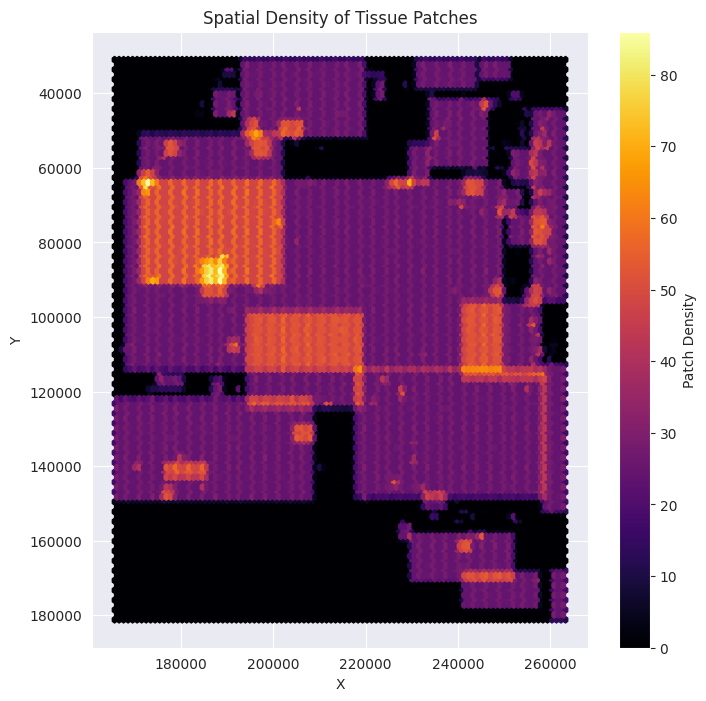

In [13]:
x = [t[0] for t in coords]
y = [t[1] for t in coords]

plt.figure(figsize=(8, 8))
plt.hexbin(x, y, gridsize=100, cmap='inferno')
plt.title("Spatial Density of Tissue Patches")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.colorbar(label="Patch Density")
plt.show()
